### Good web pages to use
<ul>
    <li><b>train_test_split:</b> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html </li>
    <li><b>RandomForestClassifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html </li>
    <li><b>Confusion matrix:</b> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
    <li><b>Use only subset of data:</b> https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html</li>
    <li><b>Optimize hyperparameters:</b> https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6 </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

### Pickle version

In [2]:
df = pd.read_pickle('10_rots.pkl')

In [3]:
# Use only a subset of the images
df = df[df["Identity"]<100] # The xx first identities

In [4]:
df.iloc[100] # Just to check that everything looks fine

Image       [255, 255, 255, 255, 255, 255, 255, 255, 255, ...
Identity                                                   15
Gender                                                      1
Hand                                                        0
Finger                                                      4
Name: 720, dtype: object

In [3]:
# Choose which columns to be data (X) and target (y)
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Identity" # The target label. In the end, Identity
X = list(df[X_name])
y = df[y_name]

In [ ]:
np.shape(X) # Should be ([number of images], [number of pixels])

### .csv version
Not finished. X has to be made into a list of integer lists. Currently consists of strings.

In [6]:
df = pd.read_csv('images2.csv')

In [7]:
df.head() # Just to check that everything looks fine

,Image,Identity,Gender,Hand,Finger
0,[160 156 156 ... 0 0 0],229,0,0,2
1,[160 156 156 ... 0 0 0],169,1,1,4
2,[160 156 156 ... 0 0 0],356,0,0,4
3,[160 156 156 ... 0 0 0],352,0,0,3
4,[160 156 156 ... 0 0 0],406,0,0,1


In [8]:
# Choose which columns to be data (X) and target (y)
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Finger" # The target label. In the end, identity
X = list(df[X_name])
y = df[y_name]

In [9]:
# Make X a list of integer lists instead of strings

In [10]:
np.shape(X) # Should be ([number of images], [number of pixels])

(6000,)

## Data fitting

In [4]:
# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
# Create the model. See link above for default values of parameters
model = RandomForestClassifier(n_estimators=100) # Larger n_estimators takes longer to calculate

In [ ]:
# Build a forest of trees from the training set (X_train, y_train).
model.fit(X_train,y_train) # Sample weight can be added, but shouldn't be necessary in our case

In [ ]:
# Return the mean accuracy on the given test data and labels.
# Preferrably as close to 1 as possible. Can be improved by tweaking
# n_estimators above
model.score(X_test,y_test)

### Cross-validation

In [9]:
scores = cross_val_score(model,X,y, cv=5) # Default 5-fold cross validation
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.01


## Find optimal number of trees
Documentation for validation curve: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html?highlight=validation%20curve#sklearn.model_selection.validation_curve

In [14]:
def get_cval(ntrees_list):
    """
    ntrees_list is a list of number of trees to try. Returns list of accuracies and standard deviations from
    cross validation.
    Uses previously generated train-test-split.
    """
    cval_list = []
    for n in ntrees_list:
        model = RandomForestClassifier(n_estimators=n)
        model.fit(X_train,y_train)
        scores = cross_val_score(model,X,y, cv=5)
        cval_list.append([scores.mean(),scores.std()])
    return cval_list

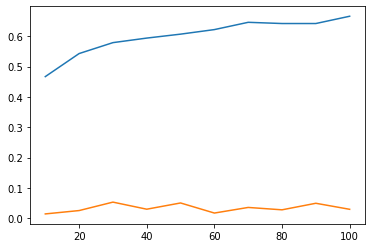

In [15]:
ntrees_list = np.arange(10,101,10)
cval_list = get_cval(ntrees_list)
plt.figure()
plt.plot(ntrees_list, [i[0] for i in cval_list], ntrees_list, [i[1] for i in cval_list])
plt.show()

In [ ]:
print(cval_list)

### Find good enough number of rotations of images


In [3]:
gdf = df.groupby(["Identity","Finger","Hand"])#.head(5)
model = RandomForestClassifier(n_estimators=50)

In [ ]:
nrots = list(range(1,11,5))
mean_cv_score = []

# Choose which columns to be data (X) and target (y)
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Identity" # The target label. In the end, Identity

for n in nrots:
    new_df = gdf.head(n)
    X = list(new_df[X_name])
    y = new_df[y_name]
    scores = cross_val_score(model,X,y, cv=5)
    mean_cv_score_cv_score.append(scores.mean())

## Confusion matrix
#### Some explanations
##### predict(X_test)
Predict class for X.<br>
The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. That is, the predicted class is the one with highest mean probability estimate across the trees.
##### Percentage or absolute numbers in the matrix
Percentage is ok if the distribution is uniform, otherwise not (better [source](https://stats.stackexchange.com/questions/55476/confusion-matrices-with-percentages-rather-than-number-of-instances) for this is needed).

Text(33.0, 0.5, 'Truth')

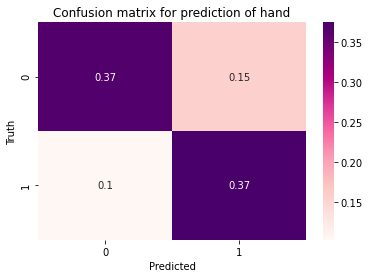

In [13]:
# Predict class for X.
y_predicted = model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_predicted, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=True, cmap='RdPu')
plt.title('Confusion matrix for prediction of '+y_name.lower())
plt.xlabel('Predicted')
plt.ylabel('Truth')